In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Asus
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Asus
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE
# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
# from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

# **Importing the Dataset**

In [6]:
reviews = pd.read_csv('../data/Musical_instruments_reviews.csv')
print('Amazon Reviews for sentiment Analysis Dataset:')
reviews

Amazon Reviews for sentiment Analysis Dataset:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [7]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(reviews.shape))
print ("The Information about the dataset:" + str(reviews.info()))

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
The Information about the dataset:None


# **Dataset Attributes**
This dataset has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text), Overall Rating on a scale 5 and Review time.

Description of columns in the file:

1. reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
2. asin - ID of the product, e.g. 0000013714
3. reviewerName - name of the reviewer
4. helpful - helpfulness rating of the review, e.g. 2/3
5. reviewText - text of the review
6. overall - rating of the product
7. summary - summary of the review
8. unixReviewTime - time of the review (unix time)
9. reviewTime - time of the review (raw)

In [8]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# **Preprocessing of Dataset**

In [9]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

There are null values in reviewerNames and reviewText. Reviewer names doesn't add any value as reviewID is present in the dataset
For reviewText dropping wouldn't be a problem as there are only 7 null values possibly due to ratings.

In [10]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [11]:
#reviews = reviews.dropna()
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

# **Deciding on nature of Sentiment**
The sentiments of review is decided on the overall score. It means that 
1. if the score is greater than 3, the sentiment is *Positive* 
2. if the value is less than 3, the sentiment is *Negative*
3. and if it is equal to 3, the sentiment is *Neutral*.

In [12]:
print('The distribution of categories of sentiment:') 
reviews['overall'].value_counts()

The distribution of categories of sentiment:


overall
5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

Combining *reviewtext* and *summary* column will not contradict the nature of sentiments.

In [13]:
reviews['reviews'] = reviews['reviewText'] + reviews['summary']
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


# **Creating a *Sentiment* Column in our dataset as label.**

In [14]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [15]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [16]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


Sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64

In [17]:
# Splitting the date 
re_new = reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# adding month to the main dataset 
reviews["date"] = re_new[0] 
  
# adding day to the main dataset 
reviews["year"] = re_new[1] 

re_new1 = reviews["date"].str.split(" ", n = 1, expand = True) 

# adding month to the main dataset 
reviews["month"] = re_new1[0] 

# adding day to the main dataset 
reviews["day"] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)
reviews.head() 

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [18]:
print('The year - wise count of reviews:')
reviews['year'].value_counts()

The year - wise count of reviews:


year
2013    4055
2014    2679
2012    1936
2011    1007
2010     350
2009     128
2008      63
2007      22
2006      10
2004       7
2005       4
Name: count, dtype: int64

In [19]:
print('Year - wise count of sentiments:')
reviews.groupby(['year','Sentiment']).size()

Year - wise count of sentiments:


year  Sentiment
2004  Positive        7
2005  Positive        4
2006  Negative        1
      Neutral         1
      Positive        8
2007  Negative        1
      Positive       21
2008  Negative        2
      Neutral         7
      Positive       54
2009  Negative        5
      Neutral         8
      Positive      115
2010  Negative       16
      Neutral        20
      Positive      314
2011  Negative       46
      Neutral        84
      Positive      877
2012  Negative       85
      Neutral       130
      Positive     1721
2013  Negative      170
      Neutral       319
      Positive     3566
2014  Negative      141
      Neutral       203
      Positive     2335
dtype: int64

This shows that *Negative* sentiment reviews were increased during the year 2013 and 2014.

# **Finding the *helpfulness* of the review**
The *helpful* feature in the datset has values in list [a,b] format, which means that *a* out of *b* people found that review helpful. But with this format, it will be difficult to decrypt the meaning for the machine as it could not add value to the machine learning model. A *helpful_review* feature is created which returns a/b value from [a,b]. 

In [20]:
newreview = reviews["helpful"].str.split(",", n = 1, expand = True)
newreview1 = newreview[0].str.split("[", n = 1, expand = True)
newreview2 = newreview[1].str.split("]", n = 1, expand = True)

#Resetting the index
newreview1.reset_index(drop=True, inplace=True)
newreview2.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
newreview1 = newreview1.drop([0], axis=1)
newreview2 = newreview2.drop([1], axis=1)

#Concatenating the splitted columns
helpfulreview = pd.concat([newreview1, newreview2], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviews,Sentiment,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21


In [21]:
#Converting into integer types
helpfulreview[0] = helpfulreview[0].astype(str).astype(int)
helpfulreview[1] = helpfulreview[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those errors
try:
  helpfulreview['result'] = helpfulreview[1]/helpfulreview[0]
except ZeroDivisionError:
  helpfulreview['result']=0

#Filling the NaN values(created due to dividing) with 0
helpfulreview['result'] = helpfulreview['result'].fillna(0)

#Rounding of the results to two decimal places
helpfulreview['result'] = helpfulreview['result'].round(2) 

#Attaching the results to a new column of the main dataframe
reviews['helpful_review'] = helpfulreview['result']

#dropping the helpful column from main dataframe
reviews = reviews.drop(['helpful'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5.0,1393545600,"Not much to write about here, but it does exac...",Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,5.0,1363392000,The product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""",5.0,1377648000,The primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,5.0,1392940800,This pop filter is great. It looks and perform...,Positive,2014,02,21,0.00


In [22]:
reviews['helpful_review'].value_counts()

helpful_review
0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: count, Length: 65, dtype: int64

The helpful_review gives rate value between 0.00 and 1.00. 
1. 0.00 indicates that the review is not much helpful
2. 1.00 indicates that the review is very helpful.

In [23]:
#Removing unnecessary columns
reviews = reviews.drop(['reviewerName','unixReviewTime'], axis=1)

In [24]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['reviews'] = reviews['reviews'].apply(lambda x: clean_review(x))
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,5.0,not much to write about here but it does exact...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,the product does exactly as it should and is q...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,the primary job of this device is to block the...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects my mxl mic and preven...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,this pop filter is great it looks and performs...,Positive,2014,02,21,0.00


# **Stop words**
Coming to stop words, general nltk stop words contains words like  “the”, “a”, “an”, “in”, and in our dataset "not", "hasn't", "would'nt" will conveys a negative sentiment. Removing such stop words will contradict the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [25]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [26]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00


# **Exploratory Data Analysis** 
On texts as well as other factors to understand what are all features which contributes to the sentiment.

Prior analysis:

1. Higher the helpful_review rate, positive the sentiment is.
2. In the year 2013 and 2014, Negative reviews were increased.
3. More reviews at the starting of a month.


# **Sentiment vs helpful_review**
First lets look whether there is any relationship between sentiment of review and helpfulness of it.

In [27]:
pd.DataFrame(reviews.groupby('Sentiment')['helpful_review'].mean())

,helpful_review
Sentiment,
Negative,0.307559
Neutral,0.275687
Positive,0.260505


In [28]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00,0.250000,162,25
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93,0.014286,356,55
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00,0.167500,315,48
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00,0.333333,169,22
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00,0.800000,136,21


In [30]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# **Sentiment Polarity Distribution**

Insights:

1. Sentiment polarity is a normally distributed.
2. Pare more ositive polarities compared to the negative polarities.

Insight:
Sentiment review length is a right skewed distribution where most of the lengths falls between 0-1000.

In [29]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [30]:
negative_review

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review,polarity,review_len,word_count
15,A2PD27UKAD3Q00,B00005ML71,2.0,bought use keyboard wasnt really aware options...,Negative,2013,08,17,0.0,0.269444,430,63
50,A12ABV9NU02O29,B000068NW5,2.0,didnt expect cable thin easily thickness guita...,Negative,2011,07,6,1.0,-0.018707,281,41
52,A1L7M2JXN4EZCR,B000068NW5,1.0,hums crackles think im problems equipment soon...,Negative,2014,02,9,0.0,0.600000,183,29
89,A3UD50M7M72150,B000068NW5,1.0,im procheapo hated thing theyre noisy cables f...,Negative,2014,03,14,0.0,-0.250000,106,16
98,A1W3CEEQBJ4GTN,B000068NZC,2.0,bought canon vixia hf video camera shotgun mic...,Negative,2013,09,16,0.0,0.073413,620,100
...,...,...,...,...,...,...,...,...,...,...,...,...
10171,A2Y2U697SS98E1,B00F2PKRJW,1.0,really wanted like but theyre frickin lintcatc...,Negative,2014,06,12,0.0,0.051623,225,36
10178,A768OB1LNE356,B00FXKIG5I,2.0,larger ones sometimes neck snap thought might ...,Negative,2014,03,22,0.5,-0.058333,277,44
10187,A3AOPVQ7EZHTWA,B00GTSM8FW,2.0,tension screw adjustment remains best capo ive...,Negative,2014,04,24,0.0,0.203853,1467,211
10189,A1SD1C8XK3Z3V1,B00GTSM8FW,2.0,fan planet waves ns capos but new one not well...,Negative,2014,06,2,1.0,0.116919,339,57


With ngram, not much information is gathered for sentiments based on one word.

# **WordCloud for Postive, Neutral, Negative Sentiments**

# **Extracting Features from Reviews**
Before building the model for doing sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. After that TF-TDF method to convert the texts.

# **Encoding target variable-sentiment**

In [31]:
# calling the label encoder function
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
reviews['Sentiment']= le.fit_transform(reviews['Sentiment']) 

reviews['Sentiment'].unique() 

array([2, 1, 0])

In [32]:
reviews['Sentiment'].value_counts()

Sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

In [33]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,product exactly quite affordablei not realized...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


# **TFIDF(Term Frequency — Inverse Document Frequency)**
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(10261, 5000)

We considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [35]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(10261,)

# **Imbalance feature target - Synthetic Minority Oversampling Technique (SMOTE)**
In our dataset, there are a lot of positive sentiments compared to negative and neutral, which makes our dataset imbalanced. In order to work for imbalance dataset, SMOTE technique is used to balance out the imbalanced dataset problem. It's aims is to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [36]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_resampled)}')

Original dataset shape : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9022, 1: 9022, 0: 9022})


Thus, the resampled data has equally distributed classes/labels.

# **Model Building**

# **Train - Test Split**
Using train test split function we are splitting the dataset into 80:20 ratio for train and test set respectively

In [37]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
#creating the objects
logreg = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'SVC', 4:'Naive Bayes', 5: 'Random Forest'}
cv_models = [logreg, dt, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 10, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8807135224190521
Decision Tree Test Accuracy: 0.81288371854661
KNN Test Accuracy: 0.8748661386236337
SVC Test Accuracy: 0.8796413976627168
Naive Bayes Test Accuracy: 0.802259082738763
Random Forest Test Accuracy: 0.877107759119751


In [40]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 5, verbose = 0,n_jobs = -1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

KeyboardInterrupt: 

From the selected parameters of C and random_state

In [41]:
logreg = LogisticRegression(C = 6866.498, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


# **Classification metrics**
Since the accuracy turns out to be 94%, for classification problems,  confusion matrix and f1 score is required than accuracy alone.

Confusion matrix, without normalization


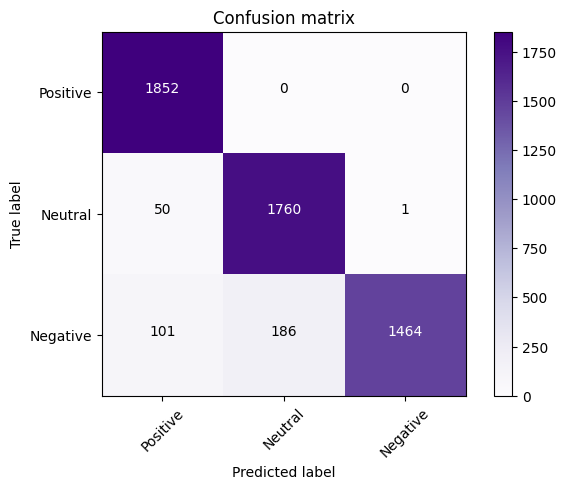

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

The diagonal elements (1846+1773+1472), they are correctly predicted records and rest are incorrectly classified by the algorithm.

In [43]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1852
           1       0.90      0.97      0.94      1811
           2       1.00      0.84      0.91      1751

    accuracy                           0.94      5414
   macro avg       0.94      0.94      0.94      5414
weighted avg       0.94      0.94      0.94      5414



# **Conclusion**
Classifying all the sentiment classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with SMOTE. Here are few insights from the notebook.

1. *ngram* in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis.
2. Most of our *neutral* reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products
3. Most of the reviews in this dataset were about string instruments such as guitar.
4. Balancing the dataset got a very fruitful accuracy score. Without balancing,a good precision is achieved but a bad recall and inturn f1 score would be affected. So balancing the target feature is important.
5. In sentiment analysis, we should concentrate on our f1 score where an average score of 94% is achieved.
Thank you for reading my notebook. 